In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Oscillators
Dynamical systems can exhibit self-excited oscillations or periodic behaviour

Such systems are referred to as oscillators

## A single oscillator
i.e. a point moving round a circle

Consider vector fields on the circle:

$$
\dot{\theta}=f(\theta)
$$

$\theta$ is the angle, or phase, and determines where on the circle one is. 

By moving around the circle we can return to our starting point and so we have periodic solutions

*Simple oscillators* have $f(\theta)=\omega$, where $\omega$ is a constant. The solution of the differential equation is $\theta=\omega t + \theta_0$ and so they have uniform, periodic motion around a circle at angular frequency $\omega$ and period $T=\frac{2\pi}{\omega}$ (we're ignoring amplitude)

More complicated vector fields could be considered such as $f(\theta)=\sin(\theta)$, which has two fixed points $\theta^* = 0, \pi$.

## Two (uncoupled) simple oscillators
i.e. two points moving around a circle independently of each other

$$
\dot{\theta}_1=\omega_1, \quad \dot{\theta}_1=\omega_2
$$

Initialising the oscillators at the same location then after some time the angle between them, their phase difference, is:

$$
\phi=\theta_1-\theta_2
$$

To determine when the points will next be at the same location in time we note:

$$
\dot{\phi}=\dot{\theta}_1- \dot{\theta}_2=\omega_1-\omega_2
$$

which is sort of like another oscillator with period $T=\frac{2\pi}{\omega_1-\omega_2}$. 

i.e. $\phi$ increases by $2\pi$ and oscillator 1 laps oscillator 2 after $T=\Big(\frac{1}{T_1}-\frac{1}{T_2}\Big)^{-1}$. 

This is an example of beat phenomenon.

### Detail
The difference in their frequencies (inversely related to their periods) causes one oscillator to gradually gain on the other

The phase of each oscillator at time $t$ can be expressed as:
- Oscillator 1: $ \theta_1(t) = \frac{2\pi t}{T_1} $
- Oscillator 2: $ \theta_2(t) = \frac{2\pi t}{T_2} $

And hence phase difference at any time $t$ is given by:

$$
\Delta \theta(t) = \theta_1(t) - \theta_2(t) = \frac{2\pi t}{T_1} - \frac{2\pi t}{T_2} = 2\pi t \left( \frac{1}{T_1} - \frac{1}{T_2} \right)
$$

One oscillator laps the other when the phase difference reaches $2\pi$, meaning one oscillator has completed exactly one more cycle than the other. So, we set $\Delta \theta(t) = 2\pi$:

$$
2\pi t \left( \frac{1}{T_1} - \frac{1}{T_2} \right) = 2\pi
$$


Solving for $t$:

$$
t = \frac{1}{\frac{1}{T_1} - \frac{1}{T_2}} = \left( \frac{1}{T_1} - \frac{1}{T_2} \right)^{-1}
$$

This $t$ is the time $T$ after which Oscillator 1 laps Oscillator 2.

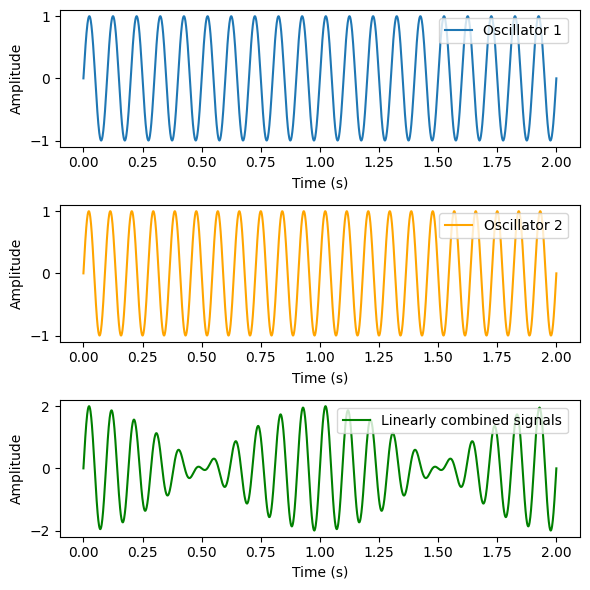

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Sampling rate in Hz
duration = 2  # Duration of the simulation in seconds
frequency_1 = 10  # Frequency of the first oscillator in Hz
frequency_2 = 11  # Frequency of the second oscillator in Hz

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration))

# Oscillator signals
signal_1 = np.sin(2 * np.pi * frequency_1 * t)
signal_2 = np.sin(2 * np.pi * frequency_2 * t)

# Combined signal (beat phenomenon)
combined_signal = signal_1 + signal_2

# Plotting
plt.figure(figsize=(6, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal_1, label='Oscillator 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.subplot(3, 1, 2)
plt.plot(t, signal_2, label='Oscillator 2', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.subplot(3, 1, 3)
plt.plot(t, combined_signal, label='Linearly combined signals', color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.legend(loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.tight_layout()
plt.show()

# Synchronisation
Synchronisation occurs when dynamical systems suddenly start to behave coherently together

It is a key type of emergent collective phenomena that may be observed in complex systems where components are coupled

It was first famously tackled by Dutch scientist Christiaan Huygens back in the 17th century as he attempted to solve the longitude problem for sailors. In an effort to improve the accuracy of timekeeping Huygens invented the pendulum clock and spoke of “the sympathy of two clocks” to describe their ability to synchonise. 
(The synchronisation was due to weak coupling between the pendulums via the vibrations transmitted through the common wooden beam support)
<!-- The fact that they synchronised ensured they were keeping the same time, which was not practically possible with two separate clocks -->

## Coupling 

Coupling can be the result of different types of interaction:
- **physical** e.g. mechanical systems or the metronomes that influence each other via the table they are on
- **informational** e.g. communication networks, where nodes transmit and receive data/signals
- **feedback** via a closed-loop interaction where the output of one system is fed back as an input to the other system e.g. thermostat-controlled heating system in a room where the output (room temperature) influences the input (heating system activation), which in turn affects the output 
- **functional** with behaviour of one system relying on the output or input of the other system. e.g. the heart and lungs in the circulatory system

The coupling can be uni-directional with one system driving the other or bi-directional with the systems mutually coupled

So what happens when two (or more) oscillators are coupled? Will we still observe beat phenomena? 

### Two coupled oscillators
i.e. that there is an interaction or influence between two points as they move around a circle, which affects their behaviour/dynamics

Consider two oscillators where the second drives the first. We want to model the following behaviour:
- If the first oscillator lags the second it will speed up
- If the first oscillator is ahead of the second it will slow down


One such coupling that achieves this is to modify the dynamics of the first oscillator to:

$$
\dot{\theta}_1 = \omega_1+K\sin(\theta_2-\theta_1)
$$

$K>0$ is a constant *coupling strength* that controls how strong the influence of the driving oscillator is

The $\sin(\theta)$ function here ensures that two oscillators are close in physical space (rather than angular space). It also captures a coupling strength and direction that depends on the relative phase

The dynamics of the phase difference $\phi=\theta_2-\theta_1$ is:

$$
\dot{\phi}=\dot{\theta}_2-\dot{\theta}_1=\omega_2-\omega_1-K\sin\phi
$$

This is a non-uniform oscillator and so things get interesting.

#### Non-dimensionalisation

To simplify the analysis we can remove unnecessary units and make any equations more general

For example, non-dimensionalised units of time let us express time in a system without using standard units like seconds, minutes, or hours. Instead, time is scaled by a characteristic time scale specific to the system under consideration:

We define dimensionless parameters:

$$
\tau=Kt
$$

$$
\mu=\frac{\omega_2-\omega_1}{K}
$$

We can now rewrite the dynamics of the phase difference in terms of our non-dimensionalised parameters: 

$$
\dot{\phi}=\dot{\theta}_2-\dot{\theta}_1=\omega_2-\omega_1-K\sin\phi
$$

Hence:

$$
\frac{d\phi}{d\tau}=\mu-\sin\phi
$$

So what do we do with this...?

### Classifying the behaviour (if you've done MATH3021)

If you've done MATH3021 you wouldn't dream of trying to analytically solve this equation:

$$
\frac{d\phi}{d\tau}=\mu-\sin\phi
$$

Instead, you'd sketch the phase portrait of $\phi$ vs $\dot{\phi}=\mu-\sin\phi$ and analyse its fixed points and their stability

The fixed points exist when $\mu=\sin\phi$:
   - If $ |\mu| \leq 1 $, there are two fixed points given by $ \phi = \arcsin(\mu) $ and $\phi = \pi - \arcsin(\mu) $.
   - If $|\mu| > 1$, there are no real fixed points because $\sin\phi$ can only take values in the interval $[-1, 1]$.

To determine the stability of the fixed points we linearise the equation around each fixed point by computing the derivative of the right-hand side with respect to $\phi$:

$$
\frac{d}{d\phi}\left(\mu - \sin\phi\right) = -\cos\phi
$$

At the fixed points $\phi^*$ where $\sin\phi^* = \mu$, the stability is determined by the sign of $-\cos\phi^*$:

   - **Stable Fixed Point**: If $-\cos\phi^* < 0$ (i.e., $\cos\phi^* > 0$), the fixed point is **stable**. 
<!--    Perturbations around this point will decay over time, leading the system back to the fixed point. -->
   - **Unstable Fixed Point**: If $-\cos\phi^* > 0$ (i.e., $\cos\phi^* < 0$), the fixed point is **unstable**. 
<!--    Perturbations will grow over time, causing the system to move away from the fixed point. -->


Interpreting this in the context of synchronisation:
- **Complete:** oscillators oscillate with the same frequency and have identical phases $\phi=n\pi$, where $n$ is even
- **Phase-locked:** oscillators maintain a constant phase difference relative to each other but may have different frequencies
    - this will occur for all other values of $\phi$
- **Phase drift:** a specific form of partial synchronisation where the phases of the oscillators exhibit a constant phase difference that changes at a steady rate
    - will occurr if $|\mu|>1$ as there are no fixed points
<!-- - **Unsynchronised:** no coherent phase relationship, leading to desynchronised behavior where oscillators operate nearly independently of each other -->

### Classifying the behaviour in general
We don't always have such clean equations for analysis. We may not have any equations at all.

In these cases, it might be sufficient to view the trajectories of the individuals that make up the system to determine the type of (if any) synchronisation that has occurred

In phase: 

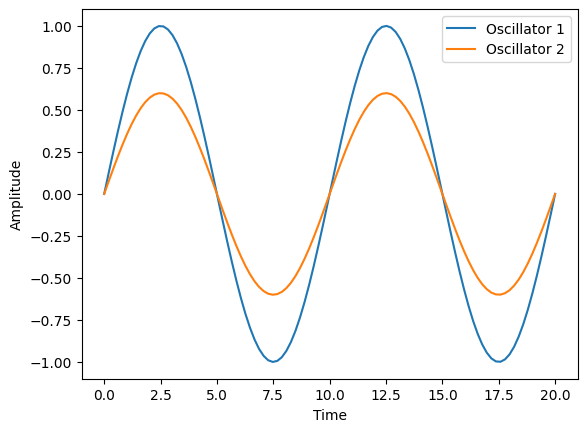

In [4]:
# Parameters
amplitude1 = 1.0
amplitude2 = 0.6
frequency = 0.1
phase_shift = 0 #np.pi /4  # Example phase shift of pi/4 radians (45 degrees)

# Time vector
t = np.linspace(0, 20, 100)  # Adjust the range and number of time points as needed

# Generate oscillator 1 (sine wave)
oscillator1 = amplitude1 * np.sin(2 * np.pi * frequency * t)

# Generate oscillator 2 (shifted sine wave)
oscillator2 = amplitude2 * np.sin(2 * np.pi * frequency * t + phase_shift)

# Plot 
plt.plot(t, oscillator1, label='Oscillator 1')
plt.plot(t, oscillator2, label='Oscillator 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Phase locked:

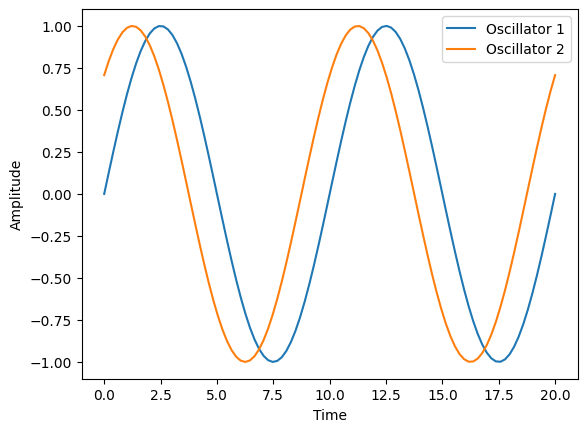

In [5]:
# Parameters
amplitude1 = 1.0
amplitude2 = 1.0
frequency = 0.1
phase_shift = np.pi /4  # Example phase shift of pi/4 radians (45 degrees)

# Time vector
t = np.linspace(0, 20, 100)  # Adjust the range and number of time points as needed

# Generate oscillator 1 (sine wave)
oscillator1 = amplitude1 * np.sin(2 * np.pi * frequency * t)

# Generate oscillator 2 (shifted sine wave)
oscillator2 = amplitude2 * np.sin(2 * np.pi * frequency * t + phase_shift)

# Plot 
plt.plot(t, oscillator1, label='Oscillator 1')
plt.plot(t, oscillator2, label='Oscillator 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Out of phase:

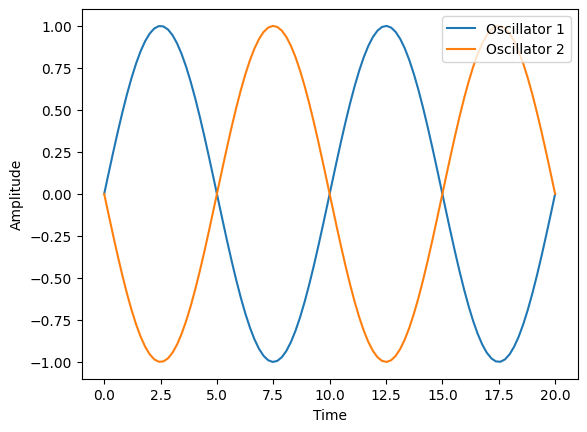

In [6]:
# Parameters
amplitude1 = 1.0
amplitude2 = 1.0
frequency = 0.1
phase_shift = np.pi /1  # Example phase shift of pi/4 radians (45 degrees)

# Time vector
t = np.linspace(0, 20, 100)  # Adjust the range and number of time points as needed

# Generate oscillator 1 (sine wave)
oscillator1 = amplitude1 * np.sin(2 * np.pi * frequency * t)

# Generate oscillator 2 (shifted sine wave)
oscillator2 = amplitude2 * np.sin(2 * np.pi * frequency * t + phase_shift)

# Plot 
plt.plot(t, oscillator1, label='Oscillator 1')
plt.plot(t, oscillator2, label='Oscillator 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')  # Specify the location of the legend (e.g., upper right)
plt.show()

For a more quantitative approach we can use metrics such as the correlation coefficient

In [7]:
# Compute the correlation coefficient
correlation_matrix = np.corrcoef(oscillator1, oscillator2)

# Extract the correlation coefficient value
correlation_coefficient = correlation_matrix[0, 1]

# Print the correlation coefficient
print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: -1.0


# Networks of coupled oscillators
<!-- For a quick review or to play with some standard systems and methods see the Networks.ipynb. -->

Why stop at two? We could couple an entire network of oscillators. 

This is an example of dynamics *on* networks 
<!-- (https://link.springer.com/book/10.1007/978-3-319-26641-1) -->

Generically, a coupled oscillator model can be modelled as:

$$
\frac{d c_i}{d t} = l_i(c_i) + k_i \sum_{j\in N_i} f(c_j - c_i)
$$

Here $l_i$ are the local/internal dynamics of oscillator $i$

e.g. for diffusion the coupling function $f$ is typically a simple difference in concentrations $c$ and $k_i$ are called diffusion constants. 

## Kuramoto model

We will explore synchronisation via the Kuramoto model: Y. Kuramoto, "Chemical Oscillations, Waves, and Turbulence," 1984, doi: 10.1007/978-3-642-69689-3.

This is a model of a system of oscillators that can synchronise despite differences in the oscillators' individual natural frequencies

There are many examples of this in both natural and engineered systems (pacemaker cells in the heart, circadian rhythms, fireflies flashing and crickets chirping,... , arrays of lasers, superconducting Josephson junctions,...)

We've already seen this model in action and observed the emergent behaviour qualitatively

Specifically, it is defined for $N$ oscillators with equally weighted all-to-all coupling:

$$ 
\dot{\theta}_i = \omega_i + \frac{K}{|\mathcal{N}_i|} \sum_{j \in \mathcal{N}_i} \sin(\theta_j - \theta_i)
$$

- $\omega_i$ is the intrinsic/natural frequency of the individual oscillator drawn from a unimodal distribution
- $\sin(x)$ is the coupling function
- we average over the number of neighbours $i$ has $|\mathcal{N}_i|$ (here a fully connected network topology is used)
- $K$ is simply a global coupling strength

The model makes several assumptions e.g. weak coupling, identical (or nearly identical) oscillators, interactions that depend sinusoidally on phase differences between each pair of objects, etc. 

## Qualititative analysis
To visualise the dynamics of the phases, it is convenient to imagine a swarm of points running around the unit circle in the complex plane


![](images/GeometricInterpretationOfOrderParam.png)


(Image from: Fig. 1 of S.H. Strogatz / Physica D 143 (2000) 1–20)

The arrow depicts the centroid, $r$, given by the complex number $e^{i\psi}$, where $\psi$ is the average phase.

## Quantitative analysis
We will use the standard phase coherence (complex order parameter) to quantify and summarise the amount of synchronisation:

$$
re^{\mathrm{i}\psi} = \frac{1}{N} \sum_j e^{\mathrm{i} \theta_j}
$$

It is effectively a way to find an average angle avoiding the awkwardness of doing things mod $2\pi$ by considering vectors in the complex plane

$r=|re^{\mathrm{i}\psi}|$ is a measure of the phase coherence. 
- $r\approx 1 \implies $ the oscillators are 'clumped' together (synched) 
- $r \approx 0 \implies $ the oscillators are scattered around the circle (independent)
- $\psi$ is like an average phase.

We've seen this before when we looked at quantifying the global behaviour of a flock. It is an order parameter here too and is measure of the average behaviour of the system that quantifies the extent to which the oscillators are synchronised (i.e. it is like we are doing a mean-field approximation to analyse the behaviour of the population of oscillators)

### The mean-field case
A mean-field analysis of the Kuramoto model involves approximating the interaction between the oscillators using a mean field that represents the average effect of the oscillators on each other

To achieve this we rewrite the governing equation in terms of the order parameter: 

Multiply the order parameter by $e^{−i\theta_i}$

$$
re^{i(\psi−\theta_i)} = \frac{1}{N}\sum_j^N e^{i (\theta_j - \theta_i)}
$$

Recall, $e^{i\theta} = \cos \theta + i \sin \theta$, and so equating imaginary parts:

$$
\text{Im}(re^{i(\psi−\theta_i)})=r\sin(\psi-\theta_i)=\frac{1}{N}\sum_{j=1}^N\sin(\theta_j-\theta_i)
$$

We can now express the coupled oscillator equations in terms of the order parameter!

$$
\dot{\theta}_i=\omega_i+Kr\sin(\psi-\theta_i), \quad i=1,2,\ldots, N
$$

In this form, the mean-field nature of the model is clear. Each individual oscillator can be seen to be essentially uncoupled from the others with dynamics controlled by mean-field quantities $r$ (the order parameter/coherence) and $\psi$ (the mean phase).

i.e. The phase $\theta_i$ is pulled towards the mean phase $\psi$ with effective strength proportional to the coherence $r$.



The mean-field case is the most tractable and is possible because the Kuramoto model corresponds to the simplest possible case of equally weighted, all-to-all, purely sinusoidal coupling

$$
\dot{\theta}_i=\omega_i+Kr\sin(\psi-\theta_i), \quad i=1,2,\ldots, N
$$

- The fixed points satisfy $\omega_i=Kr\sin(\theta_i)$ and exist if $|\omega_i|\leq Kr$ (and one is stable/phase-locked, from the stability analysis)
- if $|\omega_i|\leq Kr$ then we have phase-drift

Even in this highly simplified case of a mean-field interaction, there are still unsolved problems.

## Numerical analysis
$K$ is the parameter of interest

Integrating the model numerically we can observe how $r$ evolves in time, for a particular value of $K$:

![](images/CoherenceEvolution.png)

(Image from: Fig. 1 of S.H. Strogatz / Physica D 143 (2000) 1–20)

- $K<K_c$, the oscillators act as if they were uncoupled with $r_{\infty} \approx 0$: the phases become uniformly distributed around the circle, starting from any initial condition
- $K\approx K_c$, the incoherent state becomes unstable and $r(t)$ grows exponentially as a small cluster of oscillators become synchronised generating a collective oscillation. 
    - population splits into two groups: oscillators near center of frequency distribution lock at mean frequency and co-rotate with average phase, while those in tails run near their natural frequencies and drift relative to synchronised cluster. Often called **partially synchronised**. 
- $K>>K_c$ more and more oscillators are recruited into the synchronised cluster, and $r_{\infty}$ grows

Alternatively, we might be more interested in viewing the final coherence, $r_{\infty}$, for varied $K$. Proper ensemble runs demonstrate that $r_{\infty}$ is independent of the initial condition, i.e. there is a globally attracting state for each value of $K$

![](images/ParamSweep.png)

(Image from: Fig. 1 of S.H. Strogatz / Physica D 143 (2000) 1–20)


Returning to the [Complexity Explorable](https://www.complexity-explorables.org/explorables/ride-my-kuramotocycle/),  we can now explain the behavioural modes we observed much more precisely

- unsynchronised
    - no regular or predictable phase difference between oscillators
    - occurs with weak coupling or a broad frequency distribution
    - synchronisation is not present, indicated by an order parameter approximately 0
- drifting
    - not fully synchronised, and their phase differences gradually change over time
    - occurs with weak coupling or a broad frequency distribution
    - synchronisation level is weak, indicated by a small order parameter
- phase-locked
    - fully synchronised, and their phase differences remain constant
    - occurs with strong coupling that overcomes frequency heterogeneity (or trivially with approximately homogenous intrinsic dynamics). 
    - synchronisation level is strong, indicated by an order parameter close to one.
- complete synchronisation 
    - fully synchronised, and their phase differences are 0
    - occurs with strong coupling that overcomes frequency heterogeneity (or trivially with approximately homogenous intrinsic dynamics). 
    - synchronisation level is maximised, indicated by an order parameter is equal to one.

# Returning to the general idea

$$
\frac{d c_i}{d t} = l_i(c_i) + k_i \sum_{j\in N_i} f(c_j - c_i)
$$

# Unused

## Slime
Is your slime synchronised?

## How do previous week's topics relate?

**Previous topics:**

*Reaction-diffusion*
We can consider the spread of a disease on a network as a type of diffusion (used as a model for social contagion).

We will consider a relatively simple graph, deterministic, differential equation-based model here, but they need not be and more complex interactions, stochasticity and rule based decision making could easily be incorporated instead/as well.

The state of the nodes evolve as:
$$
\frac{d c_i}{d t} = \alpha \sum_{j \in \mathcal{N}_i}(c_j-c_i)w_{ij}
$$

$\alpha$ is the diffusion constant, $c_x$ are the concentrations at node $x=i$ and $x=j$. We have included a weighted graph so that diffusion of the node state can occur faster across edges of higher weight, $w_{ij}$. 

The state of the edges evolve as:
$$
\frac{d w_{ij}}{d t} = \beta w_{ij}(1-w_{ij})(1-\gamma |c_j-c_i|)
$$
$\beta$ is a rate of change, $\gamma$ controls how important it is to a node to be similar to its neighbours, $w_{ij}(1-w_{ij})$ keeps things between 0 and 1. 

*Cellular automata* 


*Agent-based modelling*
- Agents can synchronise
- Order parameters also used to describe global behaviour